# 1. Choose a dataset of your choice from Kaggle and develop 2 visualizations using the right
set of variables from the data. (20)
https://www.kaggle.com/datasets

In [1]:
import pandas as pd #Importing different libraries required for performing model.
import matplotlib
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

C:\Users\saket\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("Airbnb_Open_Data.csv")
df.head()

C:\Users\saket\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
df = df.fillna(0) #filling those null values with -1.
df[df.isnull().any(axis=1)]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [4]:
df.isnull().sum() #sum of null values in the whole data set

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

In [5]:
Q1=df.quantile(0.25) #25% of data is considered for quantile method.
Q3=df.quantile(0.75) #75% of data is considered for quantile method.
IQR = Q3-Q1 #IQR is found out (Inter Quantile Range)

In [6]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)] #higher boundary, lower boundary is found out and replaced.
df.shape

(59280, 26)

In [7]:
df.dtypes #different types of formats of columns

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [8]:
df['price'] = df['price'].str.replace('$','')  #replacing $ sign


In [9]:
df['price'] = df['price'].str.replace(',','') #replacing , sign between numbers

In [10]:
df['price']=df['price'].replace(np.nan,0).astype('int') #replacing NAN with 0

In [11]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                               int32
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

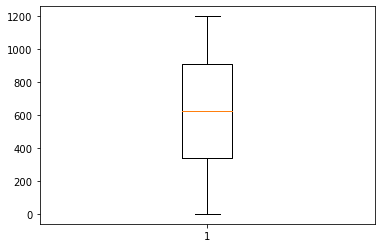

In [12]:
plt.boxplot(df['price'])
plt.show()

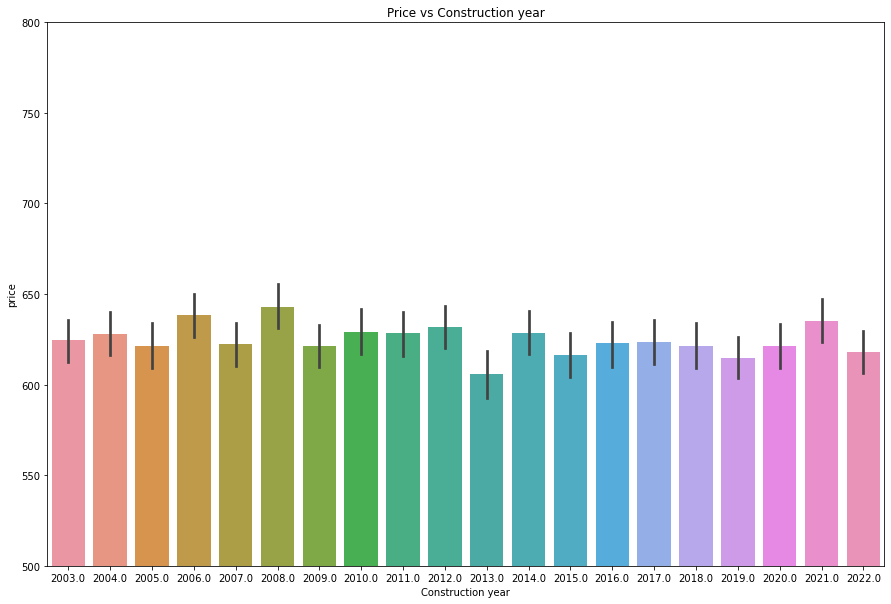

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
plt.ylim(500,800)
sns.barplot(x='Construction year',y='price',data=df,ax=ax)
plt.xlabel("Construction year")
plt.ylabel("price")
plt.title("Price vs Construction year")
plt.show()

In [15]:
df.groupby(['room type']).mean() #groupby function to group according to the room type and finding out mean of it.

,id,host id,lat,long,Construction year,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
room type,,,,,,,,,,,,
Entire home/apt,2.808667e+07,4.949646e+10,40.727189,-73.962823,2012.512684,624.371042,3.186822,13.527904,0.781511,3.242791,1.172629,110.468595
Hotel room,3.469668e+07,3.360375e+10,40.744258,-73.979359,2013.066667,610.666667,1.066667,21.200000,1.041333,3.466667,1.333333,67.066667
Private room,2.916513e+07,4.920801e+10,40.729993,-73.949540,2012.524530,624.625083,2.676835,11.850609,0.680570,3.241461,1.380524,107.711804
Shared room,2.899874e+07,4.978414e+10,40.742814,-73.952408,2012.481737,644.045410,1.926950,11.180652,0.639516,3.224087,1.458045,133.605133


In [20]:
df['room type']=df['room type'].replace('Entire home/apt','1').astype('int') #converting 'str' into numeric

In [22]:
df['room type']=df['room type'].replace('Hotel room','2').astype('int') #converting 'str' into numeric

In [23]:
df['room type']=df['room type'].replace('Private room','3').astype('int') #converting 'str' into numeric

In [24]:
df['room type']=df['room type'].replace('Shared room','4').astype('int') #converting 'str' into numeric

In [25]:
df['room type'].dtypes #type of the variable

dtype('int32')

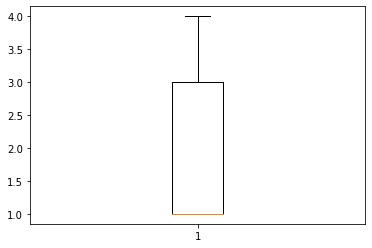

In [26]:
plt.boxplot(df['room type'])
plt.show()

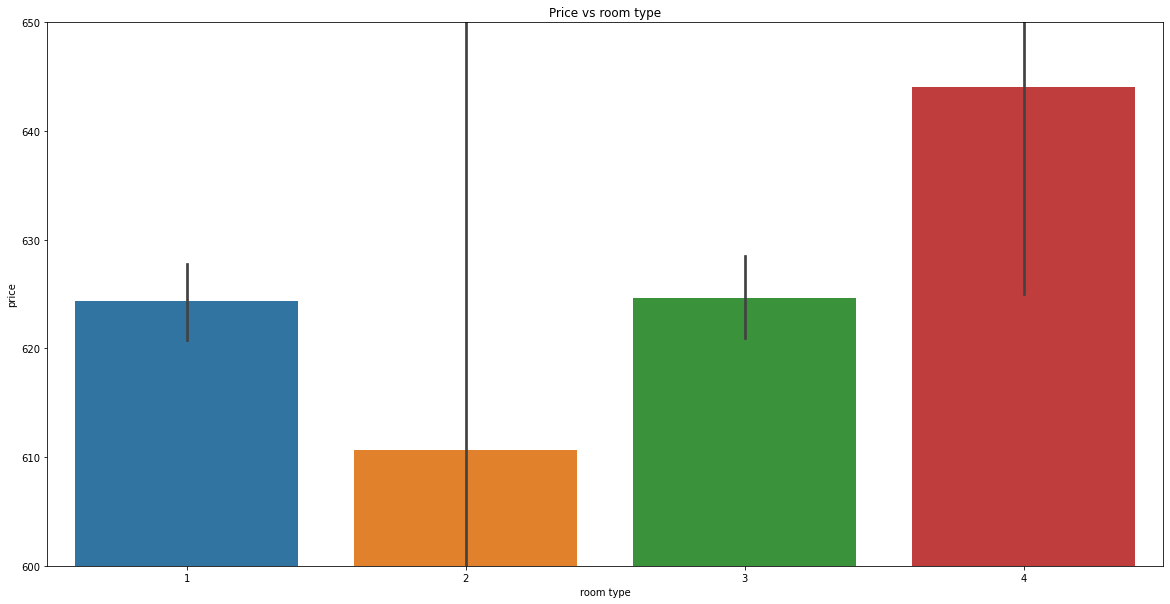

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylim(600,650)
sns.barplot(x='room type',y='price',data=df,ax=ax)
plt.xlabel("room type")
plt.ylabel("price")
plt.title("Price vs room type")
plt.show()

# 2. Perform Exploratory data analysis on the above dataset.
• What can you conclude from methods of central tendency and deviation of the
variables? (10)
• Are there any correlated variables? (10)

# Central Tendency

In [28]:
np.mean(df['price']) #mean of the variable

624.8199561403509

In [29]:
np.median(df['price']) #median of variable

624.0

In [30]:
mode=st.mode(df['price']) #mode of Variable
mode

ModeResult(mode=array([0]), count=array([117]))

# Deviation of variables

In [31]:
np.std(df['price']) #standard deviation

331.9931129523201

In [32]:
np.var(df['price']) #variance


110219.42704777195

# Correlation Value

In [33]:
df.corr() # correlation between different variables in the dataset

,id,host id,lat,long,room type,Construction year,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
id,1.000000,0.002180,-0.008819,0.047755,0.031010,0.004470,0.008351,0.001563,0.023511,0.102433,0.037569,0.030138,-0.218719
host id,0.002180,1.000000,0.000642,-0.008180,-0.004323,0.005178,0.002455,0.001083,0.003924,0.003476,0.004567,0.004910,-0.005076
lat,-0.008819,0.000642,1.000000,0.112227,0.034297,0.005910,-0.010564,-0.015313,-0.017207,-0.019671,-0.003271,-0.032999,-0.007594
long,0.047755,-0.008180,0.112227,1.000000,0.213238,0.007268,0.003964,-0.068120,0.043761,0.098832,0.014721,0.120651,0.059774
room type,0.031010,-0.004323,0.034297,0.213238,1.000000,0.000765,0.002363,-0.142948,-0.050165,-0.054967,-0.000952,0.183684,-0.003770
Construction year,0.004470,0.005178,0.005910,0.007268,0.000765,1.000000,-0.007489,0.000025,0.000536,0.005871,0.000771,-0.002777,-0.007385
price,0.008351,0.002455,-0.010564,0.003964,0.002363,-0.007489,1.000000,-0.000921,-0.000417,0.003683,-0.000497,0.004438,-0.002449
minimum nights,0.001563,0.001083,-0.015313,-0.068120,-0.142948,0.000025,-0.000921,1.000000,-0.059019,-0.143797,-0.004897,-0.057651,-0.045242
number of reviews,0.023511,0.003924,-0.017207,0.043761,-0.050165,0.000536,-0.000417,-0.059019,1.000000,0.601769,-0.006566,0.125574,0.137259
reviews per month,0.102433,0.003476,-0.019671,0.098832,-0.054967,0.005871,0.003683,-0.143797,0.601769,1.000000,0.070893,0.148697,0.103643


#### There is a co-relation between "number of reviews" and "review rate number" with ratio of 0.60. In general there is no co-relation between the variables.

# 3. Select an US company of your choice of extract the annual revenue for the past 10 years
and stock price for past 2 months. (10)
• Visualize the change of revenue over time. (10)
• Visualize the change of stock price over time. (10)

In [34]:
df1=pd.read_csv("INTC_Revenue.csv")
df1.head()

,Year,Intel Revenue in Millions (USD)
0,2021,79024
1,2020,77867
2,2019,71965
3,2018,70848
4,2017,62761


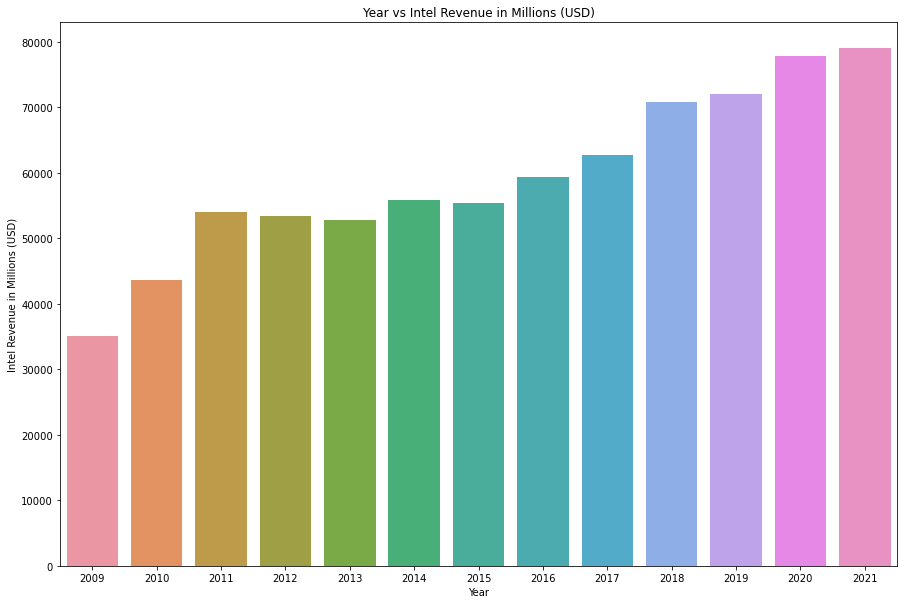

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
#plt.ylim(500,800)
sns.barplot(x='Year',y='Intel Revenue in Millions (USD)',data=df1,ax=ax)
plt.xlabel("Year")
plt.ylabel("Intel Revenue in Millions (USD)")
plt.title("Year vs Intel Revenue in Millions (USD)")
plt.show()

In [36]:
df2=pd.read_csv("INTC.csv")
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/1/2022,37.090000,37.200001,35.880001,36.340000,35.976799,40596300
1,7/5/2022,35.930000,36.740002,35.540001,36.689999,36.323299,33215000
2,7/6/2022,36.820000,37.419998,36.459999,36.990002,36.620304,26258300
3,7/7/2022,37.889999,38.330002,37.730000,38.139999,37.758808,33165400
4,7/8/2022,37.660000,38.139999,37.389999,37.990002,37.610310,22566300


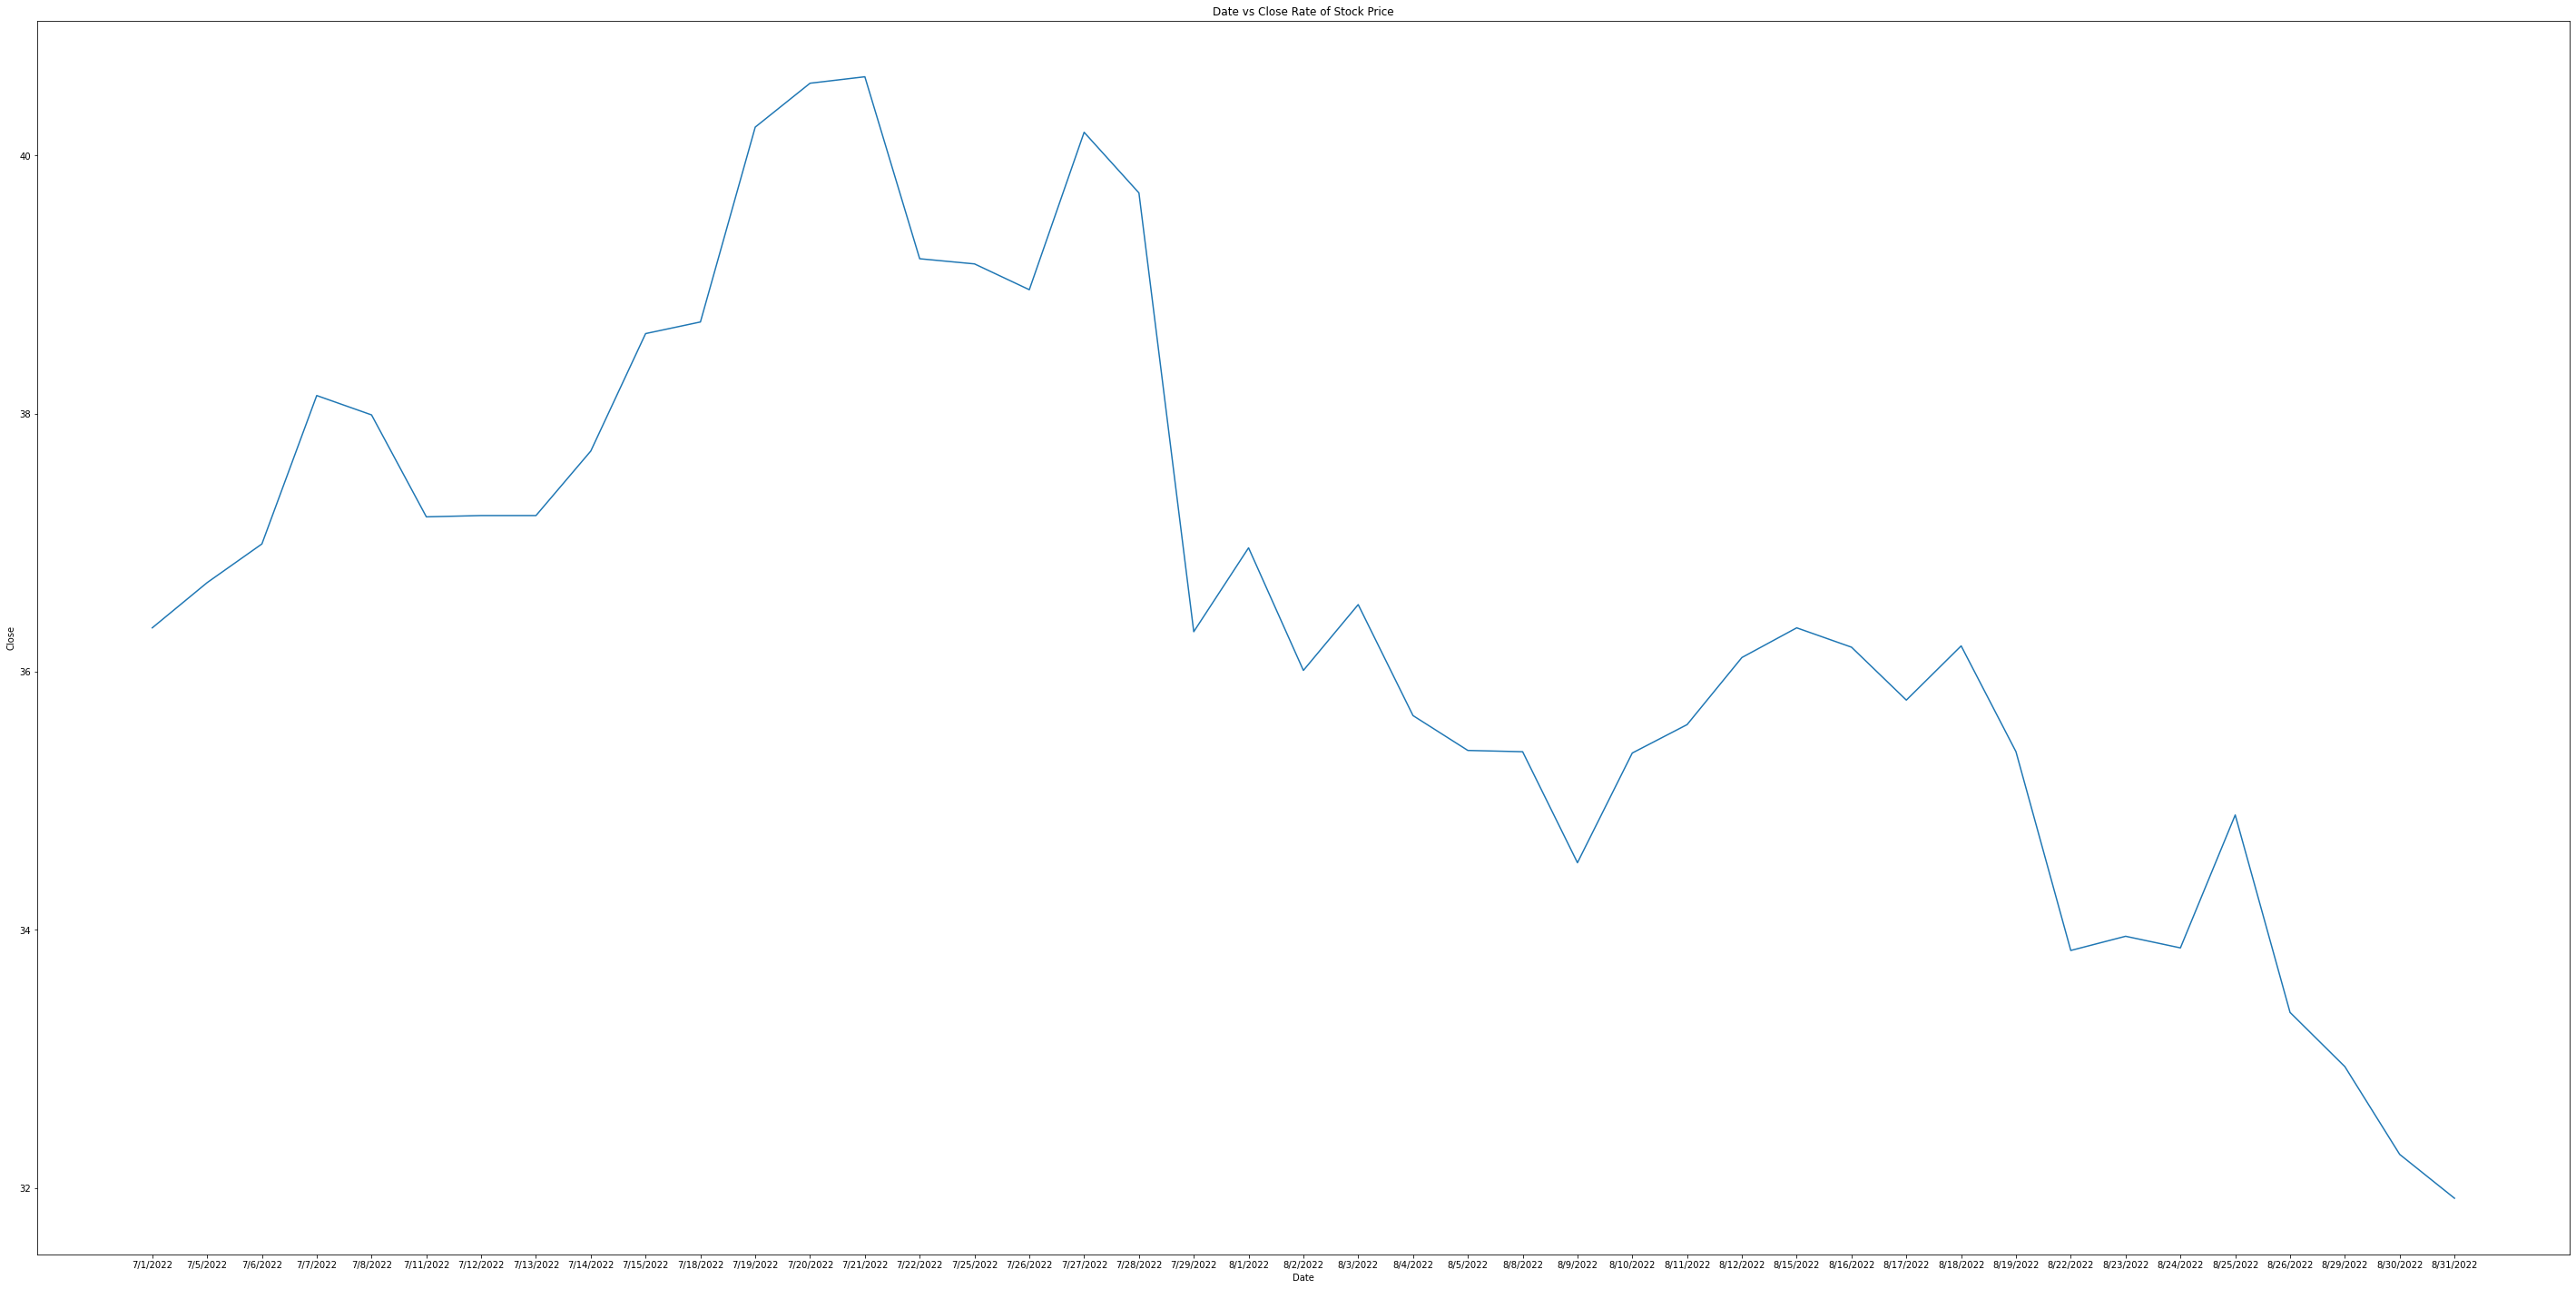

In [37]:
fig, ax = plt.subplots(figsize=(50,25))
#plt.ylim(500,800)
sns.lineplot(x='Date',y='Close',data=df2,ax=ax)
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Date vs Close Rate of Stock Price")
plt.show()

# 4. Identify 2 problems in the field of business analytics for which you can apply the
following approaches. (30)
• Supervised Learning
• Unsupervised Learning
• Reinforcement Learning

### Supervised Learning: 

    1) Risk Assessment- To predict the risk in insurance and financial industries, and which will lead to reduce the risk portfolies of the company.
    2) Fraud Detection- Used to Detect the transactions are authentic or not.
    
    

### Unsupervised Learning: 
    
    1)Identifying accident prone areas- Used to Identify accident prone areas and introduce safety.
    2) Market Basket Analysis- Identifying certain group of items , wheather likes to buy or not more likely. 

### Reinforcement Learning:
    
    1)Traffic Light Control- Helps to avoid congestion problem by predicting automatic signalling time.
    2)Gaming - Like Pacman etc